In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import multibind as mb
import numpy as np
import pandas as pd
import torch
import bindome as bd
bd.constants.ANNOTATIONS_DIRECTORY = '../annotations'
# mb.models.MultiBind
import torch.optim as topti
import torch.utils.data as tdata
import matplotlib.pyplot as plt
import seaborn as sns
import logomaker

# Use a GPU if available, as it should be faster.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: " + str(device))

Using device: cuda:0


In [88]:
mat[0]

KeyError: 0

In [89]:
import os
import scipy
matlab_path = os.path.join(bd.constants.ANNOTATIONS_DIRECTORY, 'pbm', 'affreg', 'PbmDataHom6_norm.mat')
mat = scipy.io.loadmat(matlab_path)
data = mat['PbmData'][0]
seqs_dna =  data[0][5]
seqs_dna = [s[0][0] for s in seqs_dna]

In [90]:
# load the MSA sequences, one hot encoded
import pickle
df, signal = bd.datasets.PBM.pbm_homeo_affreg()
x, y = pickle.load(open('../../data/example_homeo_PbmData.pkl', 'rb'))

### Remove cases without data
df = df[~pd.isnull(y)].reset_index(drop=True)
x = np.array(x)[~pd.isnull(y)]
x = np.array(list(map(lambda y: y.T, x)))
y = np.array(y)[~pd.isnull(y)]

# shuffle the data a bit
idx_sample = df.sample(df.shape[0]).index
df = df.reindex(idx_sample)

x = x[idx_sample]
y = y[idx_sample]
signal = signal[idx_sample]

# make all PWMs of length 15
for yi in y:
    dy = 15 - yi.shape[1]
    for i in range(yi.shape[1], 15):
        yi[i] = 0
y = np.array(list(map(lambda y: y.to_numpy(), y)))

df.shape, x.shape, y.shape

# good prediction on such a low amount of data using LSTMs.
#first 200 for training

X_train = x[:100, :]
X_test = x[100:, :]

y_train = y[:100, :]
y_test = y[100:, :] 

/tmp/ipykernel_5663/2647021225.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y = np.array(y)[~pd.isnull(y)]


In [99]:
intensity = signal[0,:]
intensity

df = pd.DataFrame()
df['intensity'] = intensity
df['seq'] = seqs_dna
df = df[['seq', 'intensity']]
data = df.copy()
data.index = data['seq']
del data['seq']
data = data.sort_values('intensity', ascending=False)

In [100]:
data.head()

,intensity
seq,
CCAGTCCCCCGCCCTGGATTAAATCTCTATAGCGGGGTCTGTGTTCCGTTGTCCGTGCTG,4.692957
CGATAATTAACCCATAACCGGGTCTACATCTGTTGAGTCTGTGTTCCGTTGTCCGTGCTG,4.569616
TGCGCGACGGATCAATCTTGAAACTAGCTTAATTGTGTCTGTGTTCCGTTGTCCGTGCTG,4.222681
CCACTAATTACAAGAGTTAAGACTGGTGATGTTCATGTCTGTGTTCCGTTGTCCGTGCTG,4.204020
CTGCGATAATTACTTTTGATCCACAGAGCAGTGAATGTCTGTGTTCCGTTGTCCGTGCTG,4.099295


In [101]:
dataset = mb.datasets.SelexDataset(data, n_rounds=0, enr_series=False)
train = tdata.DataLoader(dataset=dataset, batch_size=256, shuffle=True)

# rounds 0
# batches 1
# enr_series False
next w 15 <class 'int'>

Kernel to optimize 0

Freezing kernels
setting grad status of kernel at 0 to 1
setting grad status of kernel at 1 to 0


before kernel optimization.


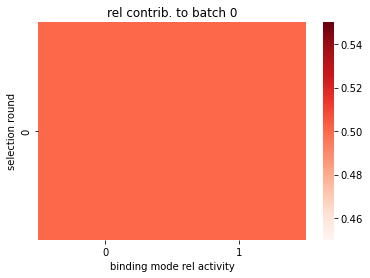


#activities
[[[1.]
  [1.]]]

#log_etas
Parameter containing:
tensor([[0.]], device='cuda:0', requires_grad=True)


/home/rio/miniconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


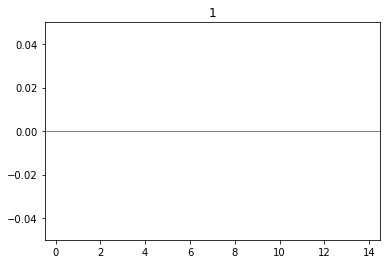

/home/rio/miniconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


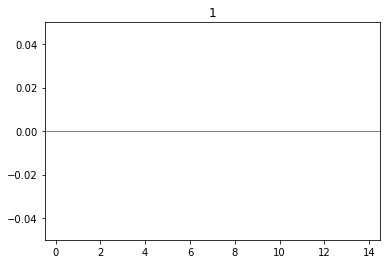

kernels mask [0 1]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.MSELoss'> n_epochs 100 early_stopping 15
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 11, Loss: 0.246769 , best epoch: 9 secs per epoch: 1.535 s
Epoch: 21, Loss: 0.246513 , best epoch: 15 secs per epoch: 1.449 s
Epoch: 31, Loss: 0.246475 , best epoch: 26 secs per epoch: 1.444 s
Epoch: 41, Loss: 0.246510 , best epoch: 26 secs per epoch: 1.482 s
Epoch: 42, Loss: 0.2465 , best epoch: 26 secs per epoch: 1.478 s
early stop!
total time: 60.605 s
secs per epoch: 1.478 s

##After kernel opt / before shift optim.


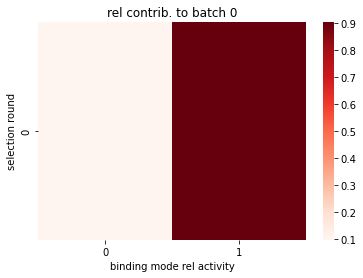


#activities
[[[0.10708279]
  [1.        ]]]

#log_etas
Parameter containing:
tensor([[0.]], device='cuda:0', requires_grad=True)


/home/rio/miniconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


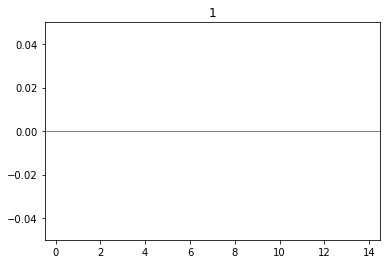

/home/rio/miniconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


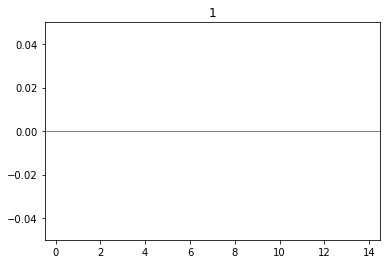

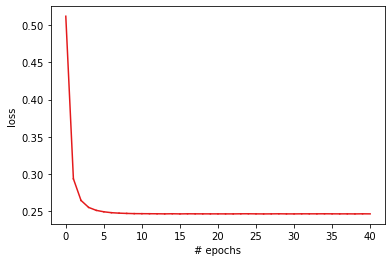

after shift optimz model


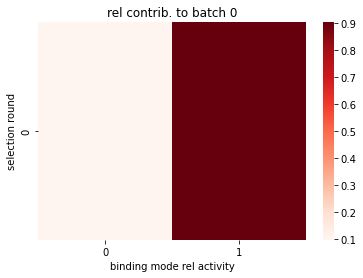


#activities
[[[0.10708279]
  [1.        ]]]

#log_etas
Parameter containing:
tensor([[0.]], device='cuda:0', requires_grad=True)


/home/rio/miniconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


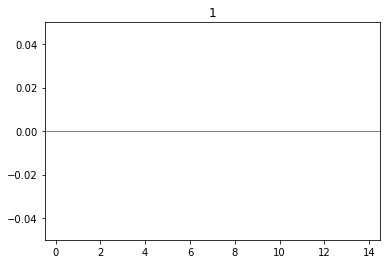

/home/rio/miniconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


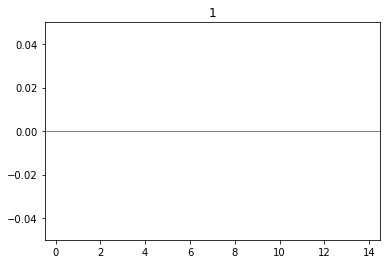

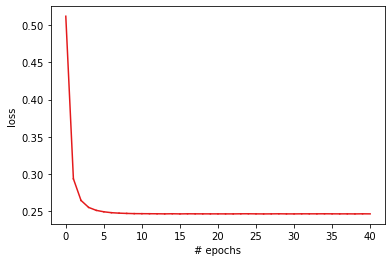



Kernel to optimize 1

Freezing kernels
setting grad status of kernel at 0 to 0
setting grad status of kernel at 1 to 1


before kernel optimization.


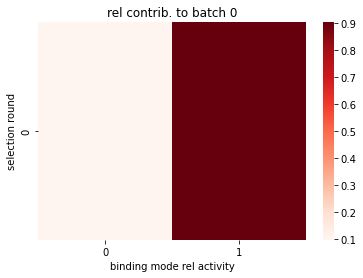


#activities
[[[0.10708279]
  [1.        ]]]

#log_etas
Parameter containing:
tensor([[0.]], device='cuda:0', requires_grad=True)


/home/rio/miniconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


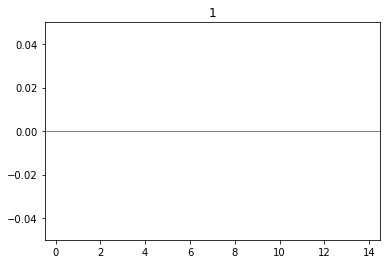

/home/rio/miniconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


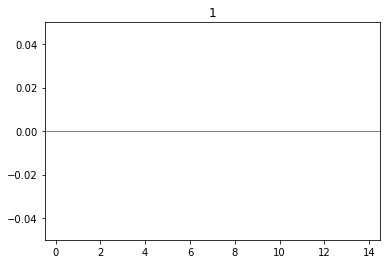

kernels mask [0 0]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.MSELoss'> n_epochs 100 early_stopping 15
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 11, Loss: 1.808125 , best epoch: 9 secs per epoch: 1.844 s
Epoch: 21, Loss: 0.661806 , best epoch: 19 secs per epoch: 1.750 s
Epoch: 31, Loss: 0.400937 , best epoch: 29 secs per epoch: 1.737 s
Epoch: 41, Loss: 0.310935 , best epoch: 39 secs per epoch: 1.869 s
Epoch: 51, Loss: 0.274812 , best epoch: 49 secs per epoch: 1.930 s


In [ ]:
model, res = mb.tl.train_iterative(train, device, w=15, n_kernels=2, ignore_kernel=True, criterion=mb.tl.MSELoss(), datatype='pbm')

R^2: 0.6560216556192338


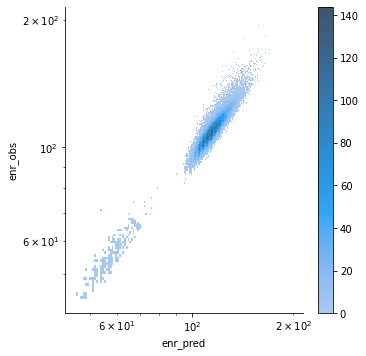

In [25]:
mb.pl.kmer_enrichment(model, train)

In [20]:
model = mb.models.Multibind(use_dinuc=False, kernels=[0, 14], n_rounds=0, n_batches=1, datatype='pbm').to(device)
l2 = []
optimiser = topti.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)
criterion = mb.tl.MSELoss()

In [21]:
mb.tl.train_network(model, train, device, optimiser, criterion, num_epochs=500, early_stopping=10, log_each=10, verbose=2)

optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.MSELoss'> n_epochs 500 early_stopping 10
lr= 0.001, weight_decay= 0.0001, dir weight= 0
Epoch: 11, Loss: 10.232148 , best epoch: 9 secs per epoch: 1.420 s
Epoch: 21, Loss: 1.167115 , best epoch: 19 secs per epoch: 1.349 s
Epoch: 31, Loss: 0.283492 , best epoch: 29 secs per epoch: 1.315 s
Epoch: 41, Loss: 0.233658 , best epoch: 39 secs per epoch: 1.279 s
Epoch: 51, Loss: 0.232160 , best epoch: 49 secs per epoch: 1.248 s
Epoch: 61, Loss: 0.229820 , best epoch: 59 secs per epoch: 1.235 s
Epoch: 71, Loss: 0.226511 , best epoch: 69 secs per epoch: 1.220 s
Epoch: 81, Loss: 0.223651 , best epoch: 79 secs per epoch: 1.209 s
Epoch: 91, Loss: 0.222225 , best epoch: 89 secs per epoch: 1.201 s
Epoch: 101, Loss: 0.219903 , best epoch: 99 secs per epoch: 1.190 s
Epoch: 111, Loss: 0.207857 , best epoch: 109 secs per epoch: 1.182 s
Epoch: 121, Loss: 0.173137 , best epoch: 119 secs per epoch: 1.178 s
Epoch: 131, Loss: 0.1530


#activities
[[[2.4867964 ]
  [0.62770444]]]

#log_etas
Parameter containing:
tensor([[0.]], requires_grad=True)


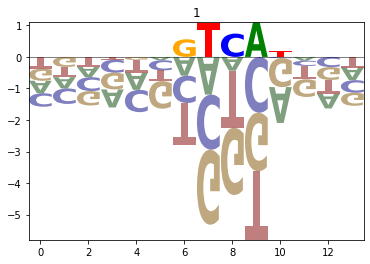

In [23]:
mb.pl.conv_mono(model)

R^2: 0.9300106984298822


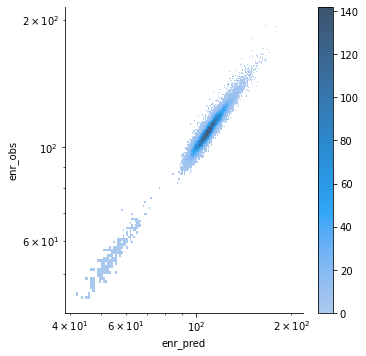

In [22]:
mb.pl.kmer_enrichment(model, train)